In [ ]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import bernoulli, cauchy, norm, gamma, poisson, binom, uniform, laplace, expon, trim_mean, iqr, beta, chi2_contingency, kstwobign, kstest, ttest_ind, mannwhitneyu
from scipy.stats import anderson, shapiro, normaltest, weibull_min, anderson_ksamp, permutation_test, ks_2samp, t, kruskal, kendalltau, pearsonr, spearmanr
import scipy.stats as sts
import statistics
from matplotlib import rc
from math import pi, log, tan, sin, inf
from scipy.optimize import minimize
from numpy import std
import scipy.special
import statsmodels.api as sm
import pandas as pd
import pingouin as pg
from hyppo.independence import Dcorr

ModuleNotFoundError: No module named 'pingouin'

In [ ]:
!pip install pingouin
!pip install hyppo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.6/146.6 kB 4.7 MB/s eta 0:00:00


In [ ]:
#2
# pairs[i][j][k] - i - номер выбороки, j - номер элемента в выборке, k = 0, то x, 1 - y
def chi_2(pairs, n, m):
    k = int(log(n)/log(2))
    c = int(n/k)
    t = k-(n - k*c)

    sorted_datax = np.array([pairs[i][np.argsort(pairs[i][:, 0])] for i in range(m)]) # сортируем по х
    binsx = np.array([[ float(( sorted_datax[j][c*i-1][0]+1e-8)*int(i<=t)+( sorted_datax[j][t*c-1+ (i-t)*(c+1)][0]+1e-8)*int(i>t)) for i in range(1, k)] for j in range(m)])
    binsx = np.concatenate((np.full((m, 1), -np.inf), binsx, np.full((m, 1), np.inf)), axis=1)

    sorted_datay = np.array([pairs[i][np.argsort(pairs[i][:, 1])] for i in range(m)]) # сортируем по y
    binsy = np.array([[ float(( sorted_datay[j][c*i-1][1]+1e-8)*int(i<=t)+( sorted_datay[j][t*c-1+ (i-t)*(c+1)][1]+1e-8)*int(i>t)) for i in range(1, k)] for j in range(m)])
    binsy = np.concatenate((np.full((m, 1), -np.inf), binsy, np.full((m, 1), np.inf)), axis=1)
    #дискретизируем
    nu= [np.histogram2d(pairs[i][:,0], pairs[i][:,1], bins=[binsx[i], binsy[i]])[0] for i in range(m)]
    return np.sort(np.array([chi2_contingency(nu[i]).pvalue for i in range(m)]))


def pvalue(pairs, n, m, s):
    p1 = np.sort(np.array([Dcorr().test(pairs[i][:, 0], pairs[i][:, 1], reps = 2000).pvalue for i in range(m)]))
    p2 = np.sort(np.array([kendalltau(pairs[i][:, 0], pairs[i][:, 1]).pvalue for i in range(m)]))
    p3 = chi_2(pairs, n, m)
    R = np.arange(1,m+1)/m
    plt.plot(p1, R, label = 'SR' )
    plt.plot(p2, R, label = 'Kendall')
    plt.plot(p3, R, label = 'chi')
    plt.plot(R,R, linestyle='dashed', color='grey')
    plt.legend(title = 'tests')
    plt.title(s)

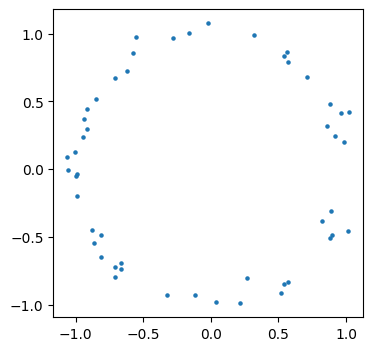

In [ ]:
radius_mean = 1
radius_std = 0.05
n = 50
m = 100
radii = np.random.normal(loc=radius_mean, scale=radius_std, size=(m, n))
angles = np.random.uniform(0, 2*np.pi, (m, n))
x = radii * np.cos(angles)
y = radii * np.sin(angles)
pairs = np.array([np.column_stack((x[i], y[i])) for i in range(m)])
plt.figure(figsize=(4, 4))
plt.scatter(x[0], y[0], s=5)
plt.axis('equal')
plt.show()

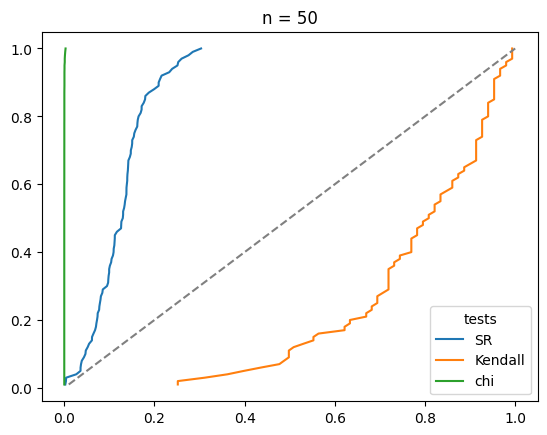

In [ ]:
pvalue(pairs, n, m, 'n = 50')

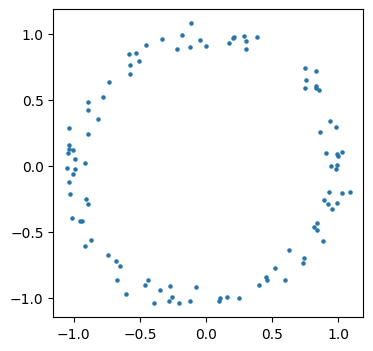

In [ ]:
radius_mean = 1
radius_std = 0.05
n = 100
m = 100
radii = np.random.normal(loc=radius_mean, scale=radius_std, size=(m, n))
angles = np.random.uniform(0, 2*np.pi, (m, n))
x = radii * np.cos(angles)
y = radii * np.sin(angles)
pairs = np.array([np.column_stack((x[i], y[i])) for i in range(m)])
plt.figure(figsize=(4, 4))
plt.scatter(x[0], y[0], s=5)
plt.axis('equal')
plt.show()

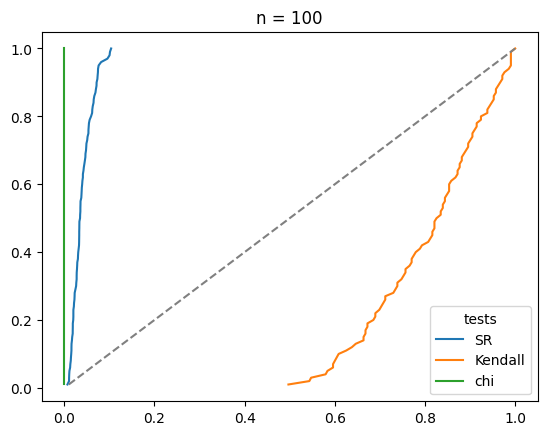

In [ ]:
pvalue(pairs, n, m, 'n = 100')

<ipython-input-10-039d6649cb5d>:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  points.append(np.random.multivariate_normal(mean, cov, (m, n)))


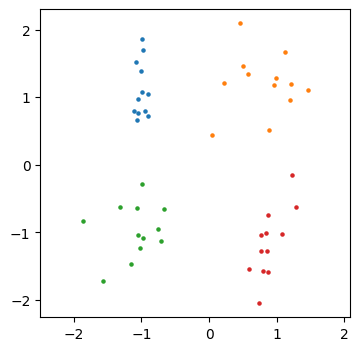

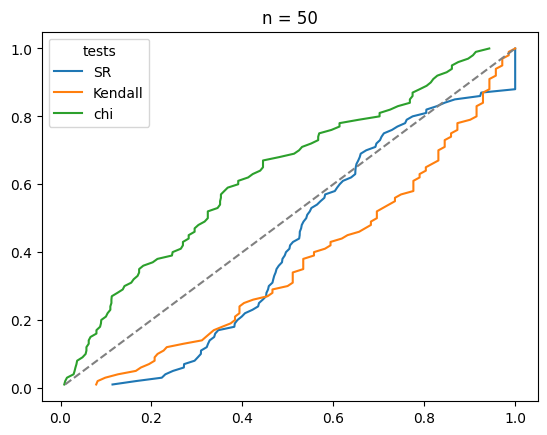

In [ ]:
means = [[-1, 1], [1, 1], [-1, -1], [1, -1]]
covs = [[[0.01, 0], [0, 0.2]], [[0.2, 0], [0, 0.2]], [[0.1, 0], [0, 0.2]], [[0.1, 0.3], [0, 0.1]]]
n = 50//4
points = []
m = 100
for mean, cov in zip(means, covs):
    points.append(np.random.multivariate_normal(mean, cov, (m, n)))
plt.figure(figsize=(4, 4))
pairs = np.array([[points[i][j] for i in range(4)] for j in range(m) ])
for cloud in pairs[0]:
    plt.scatter(cloud[:, 0], cloud[:, 1], s=5)
plt.axis('equal')
plt.show()
pairs = [np.concatenate(pairs[i], axis = 0) for i in range(m)]
pvalue(pairs, 50, m, 'n = 50')

<ipython-input-11-cbc1c4c7ffe0>:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  points.append(np.random.multivariate_normal(mean, cov, (m, n)))


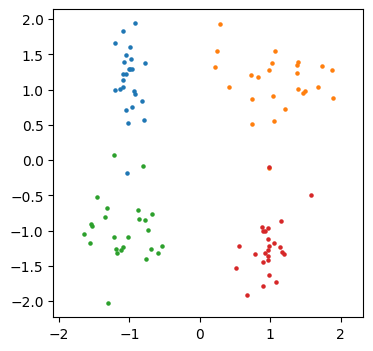

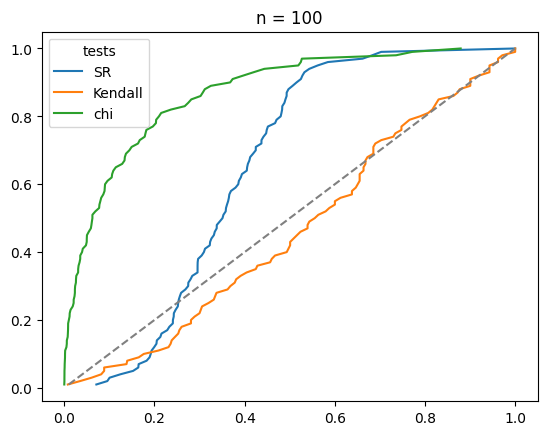

In [ ]:
means = [[-1, 1], [1, 1], [-1, -1], [1, -1]]
covs = [[[0.01, 0], [0, 0.2]], [[0.2, 0], [0, 0.2]], [[0.1, 0], [0, 0.2]], [[0.1, 0.3], [0, 0.1]]]
n = 100//4
points = []
m = 100
for mean, cov in zip(means, covs):
    points.append(np.random.multivariate_normal(mean, cov, (m, n)))
plt.figure(figsize=(4, 4))
pairs = np.array([[points[i][j] for i in range(4)] for j in range(m) ])
for cloud in pairs[0]:
    plt.scatter(cloud[:, 0], cloud[:, 1], s=5)
plt.axis('equal')
plt.show()
pairs = [np.concatenate(pairs[i], axis = 0) for i in range(m)]
pvalue(pairs, 100, m, 'n = 100')

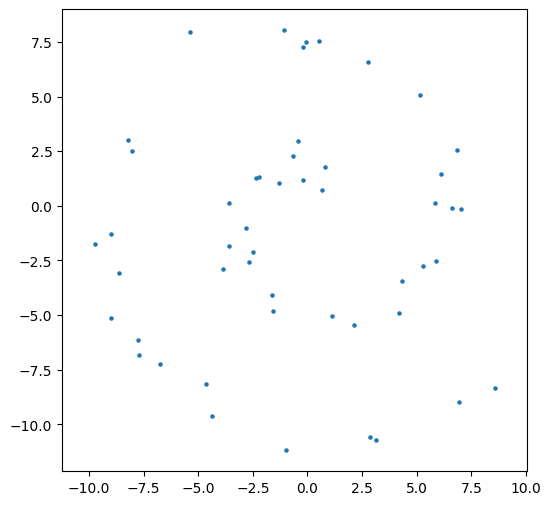

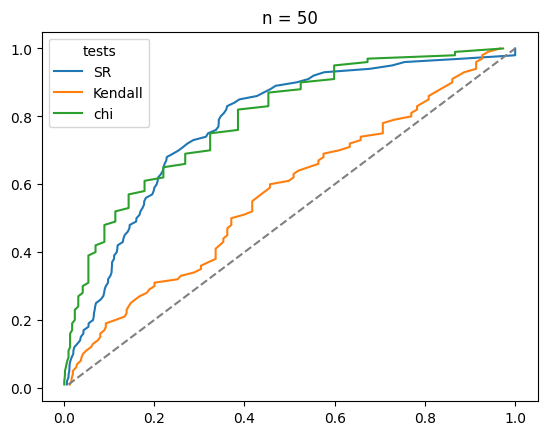

In [ ]:
n = 50
m = 100
theta = np.random.uniform(0, 4*np.pi, (m, n))
radius_err =  np.random.normal(loc=0, scale=0.5, size=(m, n))
radius = theta + radius_err
x = radius * np.cos(theta)
y = radius * np.sin(theta)
plt.figure(figsize=(6, 6))
plt.scatter(x[0], y[0], s=5)
plt.axis('equal')
plt.show()
pairs = np.array([np.column_stack((x[i], y[i])) for i in range(m)])
pvalue(pairs, n, m, 'n = 50')

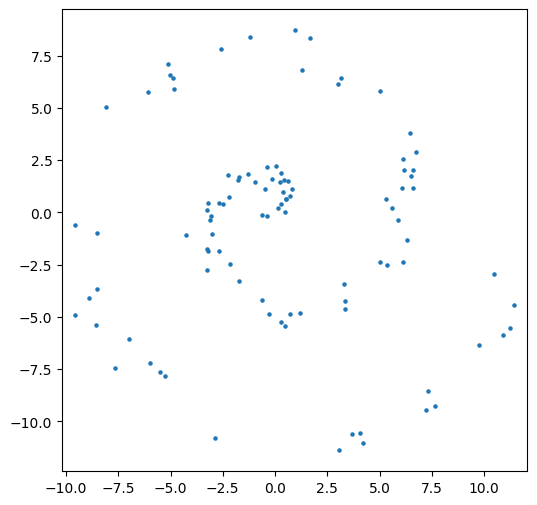

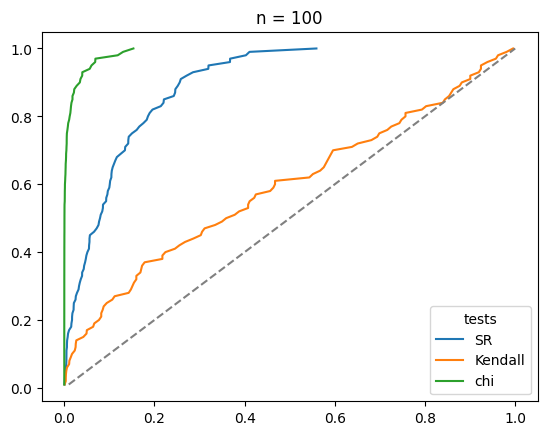

In [ ]:
n = 100
m = 100
theta = np.random.uniform(0, 4*np.pi, (m, n))
radius_err =  np.random.normal(loc=0, scale=0.5, size=(m, n))
radius = theta + radius_err
x = radius * np.cos(theta)
y = radius * np.sin(theta)
plt.figure(figsize=(6, 6))
plt.scatter(x[0], y[0], s=5)
plt.axis('equal')
plt.show()
pairs = np.array([np.column_stack((x[i], y[i])) for i in range(m)])
pvalue(pairs, n, m, 'n = 100')

In [ ]:
#3
def emp_2d(x, y, data: np.array):
    n =  len(data[0])
    pairs = list(zip(data[0,:], data[1,:]))
    test_pair = (x, y)
    res = sum([np.less_equal(pair, test_pair).prod() for pair in pairs])/n
    return res
def emp_1d(x, data):
    n = len(data)
    res = sum(data <= x)/n
    return res
def smirnov_stat(data):
    x = data[0]
    y = data[1]
    n = len(x)
    test = np.sqrt(n) * max([np.abs(emp_2d(X,Y,data) - emp_1d(X, x)*emp_1d(Y, y)) for X, Y in zip(x, y)])
    return test
def monte_carlo_test(data, statistic):
    size = len(data)
    pvalue = (data>statistic).sum()/size
    return pvalue

def gen_samp_0(size):
    X = sts.uniform.rvs(loc = -1, scale = 1, size = size)
    Y = sts.norm.rvs(loc = 0, scale = 1, size = size)
    return X, Y
def gen_samp_1(size):
    X = sts.uniform.rvs(loc = -1, scale = 3, size = size)
    Y = X + sts.norm.rvs(loc = 0, scale = 1/4, size = size)
    return X, Y
def gen_samp_2(size):
    X = sts.uniform.rvs(loc = 0, scale = 2*np.pi, size = size)
    Y = np.sin(X) + sts.norm.rvs(loc = 0, scale = 1/4, size = size)
    return X, Y



division_rate = 100
def task4(mode, size):
    if mode==0:
        plt.title("H0")
    elif mode==1:
        plt.title(r'$ Y_i = X_i^2 + \varepsilon _i, X_i \sim R[-1, 1], \varepsilon_i \sim N(0, 0.5) $')
    else:
        plt.title(r'$ Y_i = sin (X_i) + \varepsilon_i, X_i \sim R[0, 2\pi], \varepsilon_i \sim N(0, 0.5) $')
    res_smr, res_prs, res_knd, res_spr, res_sr = [], [], [], [], []
    division_rate = 100

    size_ = (2, size)
    data_test = np.array([smirnov_stat(sts.uniform.rvs(size=size_)) for k in range(1000)])

    if mode==0:
        generate_func = gen_samp_0
    elif mode==1:
        generate_func = gen_samp_1
    else:
        generate_func = gen_samp_2

    for j in range(division_rate):
        x, y = generate_func(size)
        res_sr.append(Dcorr().test(x, y).pvalue)
        res_knd.append(sts.kendalltau(x, y).pvalue)
        res_smr.append(monte_carlo_test(data_test, smirnov_stat(np.array([x,y]))))
        res_prs.append(sts.pearsonr(x, y)[1])
        res_spr.append(sts.spearmanr(x, y)[1])
    y = np.linspace(0,1,division_rate)
    plt.plot(np.sort(res_sr), y, label = "SR")
    plt.plot(np.sort(res_knd), y, label = "Kendall")
    plt.plot(np.sort(res_smr), y, label = "Smirnov")
    plt.plot(np.sort(res_prs), y, label = "Pearson")
    plt.plot(np.sort(res_spr), y, label = "Spearman")

    plt.plot(y,y, linestyle='dashed', color = 'black')
    plt.legend()
    plt.show()

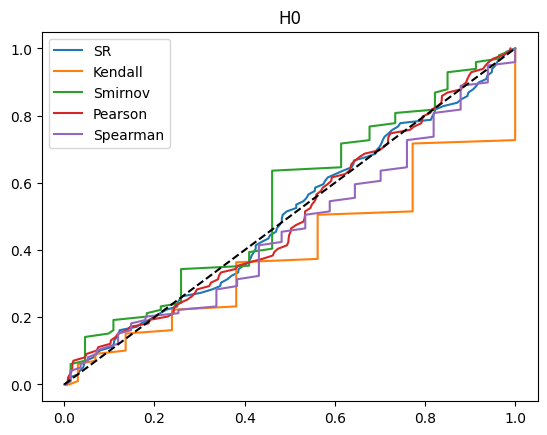

In [ ]:
task4(0, 7)

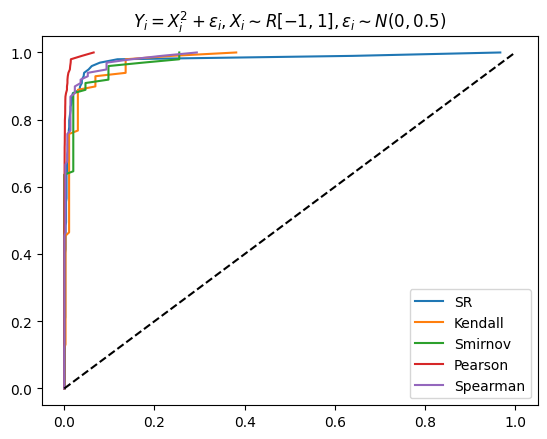

In [ ]:
task4(1, 7)

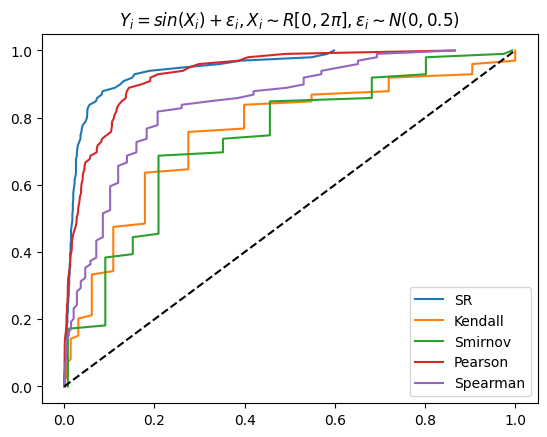

In [ ]:
task4(2, 8)

In [ ]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
!pip install hyppo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.6/146.6 kB 1.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import bernoulli, cauchy, norm, gamma, poisson, binom, uniform, laplace, expon, trim_mean, iqr, beta, chi2_contingency, kstwobign, kstest, ttest_ind, mannwhitneyu
from scipy.stats import anderson, shapiro, normaltest, weibull_min, anderson_ksamp, permutation_test, ks_2samp, t, kruskal, kendalltau, pearsonr, spearmanr
import scipy.stats as sts
import statistics
from matplotlib import rc
from math import pi, log, tan, sin, inf
from scipy.optimize import minimize
from numpy import std
import scipy.special
import statsmodels.api as sm
import pandas as pd
import pingouin as pg
from hyppo.independence import Dcorr

In [ ]:
data=pd.read_csv('/content/priem.csv')

data.head()

,Пол,Сумма.баллов,ЕГЭ...матем.,ЕГЭ...рус.яз.,Аттестат.с.отличием.оценка,ГТО.оценка,Сочинение.оценка,Регион,Тип.насел..пункта,Дата.рождения,День.рождения,Месяц.рождения
0,МУЖСКОЙ,388,90.0,98.0,5,0,1,Красноярский край,ГОРОД,24.09.1998,24,9
1,ЖЕНСКИЙ,351,84.0,87.0,0,0,2,Чувашская Респ,ЦЕНТР СУБЪЕКТА ФЕДЕРАЦИИ,14.02.1997,14,2
2,ЖЕНСКИЙ,355,94.0,91.0,5,0,2,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,25.03.2000,25,3
3,ЖЕНСКИЙ,338,76.0,88.0,5,0,2,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,19.11.1999,19,11
4,МУЖСКОЙ,349,82.0,93.0,5,0,2,Москва г,ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,12.12.1999,12,12


In [ ]:
# обычная корреляция баллов
r = (((data['ЕГЭ...матем.'] - data['ЕГЭ...матем.'].mean()) *
      (data['ЕГЭ...рус.яз.'] - data['ЕГЭ...рус.яз.'].mean())).mean() /
        (data['ЕГЭ...матем.'].std() * data['ЕГЭ...рус.яз.'].std()))
r

0.1520046884544055

In [ ]:
r_math_cert = (((data['ЕГЭ...матем.'] - data['ЕГЭ...матем.'].mean()) *
                  (data['Аттестат.с.отличием.оценка'] - data['Аттестат.с.отличием.оценка'].mean())).mean() /
                    (data['ЕГЭ...матем.'].std() * data['Аттестат.с.отличием.оценка'].std()))
r_rus_cert = (((data['ЕГЭ...рус.яз.'] - data['ЕГЭ...рус.яз.'].mean()) *
                  (data['Аттестат.с.отличием.оценка'] - data['Аттестат.с.отличием.оценка'].mean())).mean() /
                    (data['ЕГЭ...рус.яз.'].std() * data['Аттестат.с.отличием.оценка'].std()))

In [ ]:
# частный коэффициент корреляции баллов при условии аттестата
(r - r_math_cert * r_rus_cert) / (np.sqrt((1 - r_math_cert ** 2) * (1 - r_rus_cert ** 2)))

0.1341291571612695

In [ ]:
r_math_sum = (((data['ЕГЭ...матем.'] - data['ЕГЭ...матем.'].mean()) *
                  (data['Сумма.баллов'] - data['Сумма.баллов'].mean())).mean() /
                    (data['ЕГЭ...матем.'].std() * data['Сумма.баллов'].std()))
r_rus_sum = (((data['ЕГЭ...рус.яз.'] - data['ЕГЭ...рус.яз.'].mean()) *
                  (data['Сумма.баллов'] - data['Сумма.баллов'].mean())).mean() /
                    (data['ЕГЭ...рус.яз.'].std() * data['Сумма.баллов'].std()))

In [ ]:
# частный коэффициент корреляции баллов при условии суммы баллов
(r - r_math_sum * r_rus_sum) / (np.sqrt((1 - r_math_sum ** 2) * (1 - r_rus_sum ** 2)))

-0.17069133661229607